## CM4044: AI In Chemistry
## Semester 1 2020/21

<hr>

## Tutorial 5.4: Common Machine Learning (ML) Algorithms Part IV
## Objectives

### $\bullet$ Principal Component Analysis (PCA)

<hr>

This tutorial continues the second part of the same topic, "Introduction to Common Machine Learning Algorithms".

## 1. Principal Component Analysis

According to Wikipedia, **Principal Component Analysis (PCA)** is a statistical procedure that uses an **orthogonal transformation** to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called **principal components (PCs)**. Common mathematics behind PCA are Eigenvalue Decomposition and Singular Value Decomposition(SVD) from linear algebra.

By transforming correlated variables to independent variables (PCs), it means the represenation goes from high dimensional space into  a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. Essentially, the PCA technique results in dimensionality reduction in representation. 

<u>Dimension Reduction refers to the process of converting a set of data having vast dimensions into data with lesser dimensions ensuring that it conveys similar information concisely</u>. These techniques are typically used while solving machine learning problems to obtain better features for a classification or regression task.


### What are the benefits of Dimension Reduction?

Let’s look at the benefits of applying Dimension Reduction process:

- It helps in data compressing and reducing the storage space required
- It fastens the time required for performing same computations. Less dimensions leads to less computing, also less dimensions can allow usage of algorithms unfit for a large number of dimensions
- It takes care of multi-collinearity that improves the model performance. It removes redundant features. For example: there is no point in storing a value in two different units (meters and inches).
- Reducing the dimensions of data to 2D or 3D may allow us to plot and visualize it precisely. You can then observe patterns more clearly. Below you can see that, how a 3D data is converted into 2D. First it has identified the 2D plane then represented the points on these two new principal axes.
<img src="./Iris_PCA.png" width="400" height="400" />
- It is helpful in noise removal also and as result of that we can improve the performance of models.

### Principal Component (PC) 

Principal components have both direction and magnitude. **<u>The first principal component accounts for most of the possible variation of original data (the direction that the data has large spread out) after which each succeeding component has the highest possible variance.</u>** 

**The second principal component must be orthogonal to the first principal component.** In other words, it does its best to capture the variance in the data that is not captured by the first principal component. For two-dimensional dataset, there can be only two principal components. Below is a snapshot of the data and its first and second principal components. You can notice that second principle component is orthogonal to first principle component.

<img src="./PCA.jpg" width="400" height="400" />

The principal components are sensitive to the scale of measurement, so we should always standardize variables before applying PCA. 

Applying PCA to your data set loses the meaning of the original features. If interpretability of the results is important for your analysis, PCA is not the right technique for your project.


### Notes:
If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.



### 1.1 PCA for data visulisation

We use PCA to process the Iris data set.

In [1]:
import pandas as pd
import numpy as np

# load dataset into Pandas DataFrame
iris = pd.read_csv('./iris.csv', names=['sepal length','sepal width','petal length','petal width','class'])

print(iris.info())
print()

iris.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None



,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- The Iris data set has four features: `sepal length`, `sepal width`, `petal length`, `petal width`

To apply PCA, we need to standardize the data by `sklearn.preprocessing.StandardScaler()` method:

In [2]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
X = iris.loc[:, features].to_numpy()

# Separating out the target
y = iris.loc[:,['class']].to_numpy()

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [3]:
from sklearn.decomposition import PCA

# Let us create a PCA model with 2 components from sklearn.decomposition. 
pca = PCA(n_components=2)
# fit PCA model using fit_transform function to the data X1 
# the result pc contains the principal components.
pc = pca.fit_transform(X)

Make the 2D table:

In [4]:
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2'])
pc_df['Class'] = y
pc_df.head()

,PC1,PC2,Class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Check the variances on the two PCs:

In [5]:
print(pca.explained_variance_ratio_)
print()
print(np.sum(pca.explained_variance_ratio_))

[0.72770452 0.23030523]

0.9580097536148199


- the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

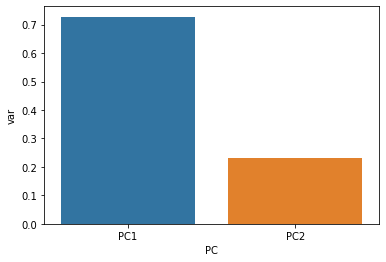

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})
sns.barplot(x='PC',y="var", 
           data=df);

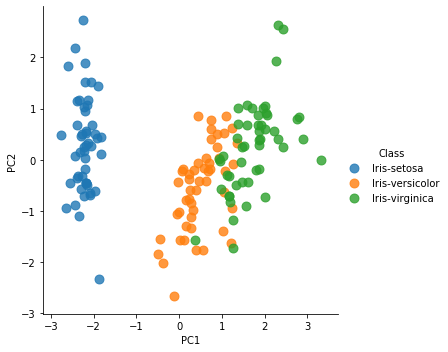

In [7]:
g = sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Class', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

### 1.2 PCA to speed up Machine Learning 

A data set with several hundreds of features will welcome applying PCA to reduce dimensionality of the feature space before training a machine learning model. For example, we can apply it to deal with image processing to recognise handwriting digits from image.

In the following example, we apply PCA and Logistic regression to handle a big data set MNIST. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples. This is a big data set to demonstrate the value to apply PCA.

In [8]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns


mnist = pd.read_csv('./mnist_784.csv')

print(mnist.shape)
print()


(70000, 785)



In [9]:
mnist.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


The images are contained in mnist.csv and has a shape of (70000, 785) meaning there are 70,000 images, 784 dimensions (784 features) and 1 label. The labels (the integers 0–9) are contained in mnist.class, the last column. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

To display some images:

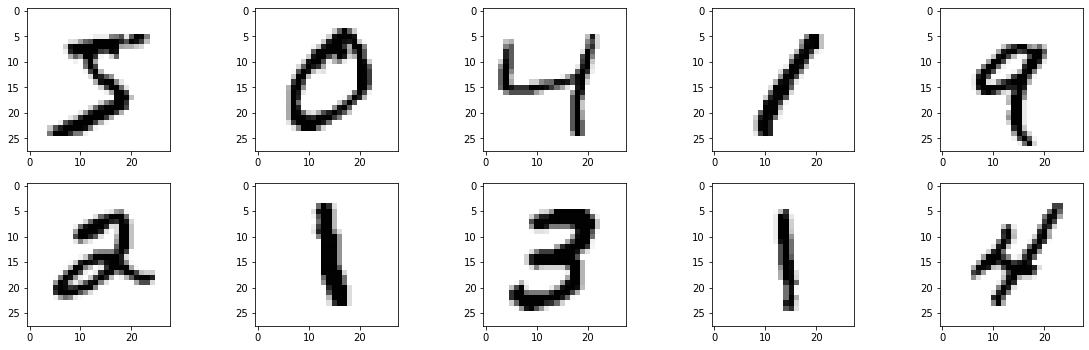

In [10]:
#pass data to numpy array
X = mnist.iloc[:,0:784].to_numpy()    # feature array
y = mnist.iloc[:,784].to_numpy()      # label array

img = X.reshape(70000,28,28)

fig, axes = plt.subplots(2,5, figsize=(16,5))
fig.tight_layout()

# in the previous line, axes is a 2 x 2 array
# convert it into 1D array for easy indexing later.
axes = axes.flatten()

for i in range(0,10):
   axes[i].imshow(img[i], cmap='binary')

plt.show()


Split data into train and test sets:

In [11]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=1/7, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


Standardize data for applying PCA:

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
print(X_train.shape)
X_test = scaler.transform(X_test)
print(X_test.shape)

(60000, 784)
(10000, 784)


Require scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [13]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)  # 95% of variance is retained

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(60000, 327)
(10000, 327)


Construct Logistic regression classifier and train it:

In [14]:
from sklearn.linear_model import LogisticRegression

# increase the maximum iteration number in the training
logReg_clf = LogisticRegression(max_iter = 1000)

logReg_clf.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Predict for One Observation (image)
logReg_clf.predict(X_test[0].reshape(1,-1))

array([0], dtype=int64)

In [16]:
# Predict for One Observation (image)
logReg_clf.predict(X_test[0:10])

array([0, 4, 1, 2, 4, 7, 7, 1, 1, 7], dtype=int64)

Measuring model performance by score;

In [17]:
logReg_clf.score(X_test, y_test)

0.9184

- accuracy is not always the best metric for classficationn model, you may want to check on others, such as precision, recall, F1 Score, ROC Curve, etc.